In [50]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [26]:
clinical_df = pd.read_csv('../../data/Clinical/SKCM_DATA_Clinical.csv', index_col = 0)
clinical_df.set_index('submitter_id',inplace=True)
clinical_df = clinical_df[~clinical_df.index.duplicated(keep='first')]
clinical_df = clinical_df[clinical_df.sample_type != "Solid Tissue Normal"]
print(clinical_df.shape)
clinical_df.head()

(469, 73)


,synchronous_malignancy,ajcc_pathologic_stage,tumor_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,age_at_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,prior_treatment,state,days_to_last_known_disease_status,ajcc_staging_system_edition,ajcc_pathologic_t,days_to_recurrence,morphology,ajcc_pathologic_n,ajcc_pathologic_m,classification_of_tumor,diagnosis_id,icd_10_code,site_of_resection_or_biopsy,tumor_grade,progression_or_recurrence,cigarettes_per_day,alcohol_history,exposure_id,years_smoked,weight,alcohol_intensity,height,bmi,race,gender,ethnicity,vital_status,age_at_index,days_to_birth,year_of_birth,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_intent_type,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_type,treatments_pharmaceutical_therapeutic_agents,treatments_pharmaceutical_treatment_or_therapy,treatments_pharmaceutical_days_to_treatment_end,treatments_pharmaceutical_days_to_treatment_start,treatments_pharmaceutical_regimen_or_line_of_therapy,treatments_pharmaceutical_treatment_effect,treatments_pharmaceutical_initial_disease_status,treatments_pharmaceutical_treatment_anatomic_site,treatments_pharmaceutical_treatment_outcome,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_id,treatments_radiation_treatment_type,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease,sample_type
submitter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-BF-A1PZ,No,Stage IIB,stage iib,0.0,NaN,not reported,"Skin, NOS",853.0,"Malignant melanoma, NOS",26240.0,2019-08-08T17:29:28.028808-05:00,no,2010.0,No,released,NaN,7th,T4a,NaN,8720/3,N0,M0,not reported,58877acc-4579-5cbc-b0d7-a1a60f9d9360,C44.9,"Skin, NOS",not reported,not reported,NaN,Not Reported,3224ecb7-496a-52b2-bb06-79faa29362bd,NaN,56.0,NaN,163.0,21.077195,white,female,not hispanic or latino,Alive,71.0,-26240.0,1939.0,a951cc17-255b-52c1-8b16-06a110a1f256,NaN,NaN,NaN,a738fcf5-fbc5-54ae-9aca-a474c981980b,"Pharmaceutical Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606f9d0c-405a-51a7-83b6-850abd587e3e,"Radiation Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-BF-A1PZ,SKCM,Primary Tumor
TCGA-HR-A5NC,No,NaN,not reported,0.0,NaN,not reported,"Skin, NOS",0.0,"Malignant melanoma, NOS",32872.0,2019-08-08T17:32:34.888606-05:00,no,NaN,No,released,NaN,6th,T4,NaN,8720/3,NX,M0,not reported,0a71cde5-a658-58fa-8f7d-5b461ed5ba0d,C44.5,Skin of trunk,not reported,not reported,NaN,Not Reported,6f513e61-8df3-557c-8970-79ed709b496c,NaN,NaN,NaN,152.0,NaN,not reported,female,not reported,Alive,90.0,-32872.0,NaN,2bf37b46-b292-5211-8308-8e7478e13fac,NaN,NaN,NaN,0a4cb88c-3f7d-58b9-861e-4e99f1e79879,"Pharmaceutical Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5bec652c-8fcf-5693-ba5f-a4c685cfbafd,"Radiation Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-HR-A5NC,SKCM,Primary Tumor
TCGA-EE-A183,No,Stage 0,stage 0,0.0,NaN,not reported,"Skin, NOS",NaN,"Malignant melanoma, NOS",17788.0,2019-08-08T17:31:00.525265-05:00,no,2007.0,No,released,NaN,6th,Tis,NaN,8720/3,N0,M0,not reported,ad50acaa-3906-5038-a738-b1df7206c3fb,C77.3,Lymph nodes of axilla or arm,not reported,not reported,NaN,Not Reported,5e224124-5dc5-5e14-a52d-aebafebbdae1,NaN,NaN,NaN,NaN,NaN,white,male,not hispanic or latino,Dead,48.0,-17788.0,1959.0,f890ebbe-7014-5316-9088-92d883eb8050,2009.0,818.0,NaN,2ac616a8-887f-53c2-a8ea-ae66c6d48a02,"Pharmaceutical Therapy, NOS",NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f7775347-3381-519c-b1fd-c61f6d261154,"Radiation Therapy, NOS"

In [27]:
clinical_df.groupby(['sample_type','gender'])['sample_type'].agg(['count'])

count
sample_type   gender       
Metastatic    female    138
              male      227
Primary Tumor female     42
              male       61

In [28]:
clinical_df.groupby(['sample_type','ethnicity'])['sample_type'].agg(['count'])

count
sample_type   ethnicity                    
Metastatic    hispanic or latino          7
              not hispanic or latino    350
              not reported                8
Primary Tumor hispanic or latino          4
              not hispanic or latino     94
              not reported                5

In [29]:
clinical_df.groupby(['sample_type','ajcc_pathologic_stage'])['sample_type'].agg(['count'])

count
sample_type   ajcc_pathologic_stage       
Metastatic    Not Reported              13
              Stage 0                    7
              Stage I                   29
              Stage IA                  18
              Stage IB                  28
              Stage II                  26
              Stage IIA                 14
              Stage IIB                 19
              Stage IIC                 15
              Stage III                 39
              Stage IIIA                15
              Stage IIIB                34
              Stage IIIC                55
              Stage IV                  20
Primary Tumor Not Reported               1
              Stage I                    1
              Stage IB                   1
              Stage II                   4
              Stage IIA                  4
              Stage IIB                  9
              Stage IIC                 49
              Stage III                  2
              Stage IIIA                 1
              Stage IIIB                12
              Stage IIIC                12
              Stage IV                   3

In [30]:
clinical_df['bmi'].describe()

count    250.000000
mean      27.941862
std        6.104201
min       17.630854
25%       23.536664
50%       26.609745
75%       31.384390
max       55.473373
Name: bmi, dtype: float64

In [31]:
print(clinical_df[(clinical_df['bmi'] <= 18.5)]['bmi'].count())
print(clinical_df[(clinical_df['bmi']> 19.0) & (clinical_df['bmi'] <= 24.9)]['bmi'].count())
print(clinical_df[(clinical_df['bmi']> 25.0) & (clinical_df['bmi'] <= 29.9)]['bmi'].count())
print(clinical_df[(clinical_df['bmi']>= 30.0)]['bmi'].count())

5
73
88
78


Metastatic       365
Primary Tumor    103
Name: sample_type, dtype: int64


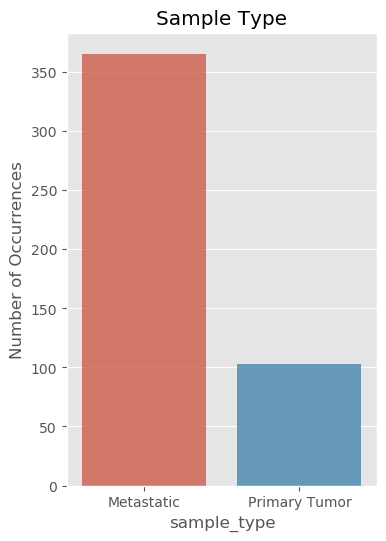

In [32]:
count  = clinical_df['sample_type'].value_counts()
print(count)
plt.figure()
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Sample Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sample_type', fontsize=12)
plt.show()

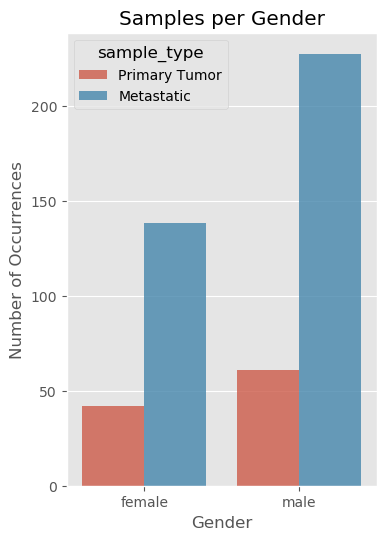

In [33]:
plt.figure()
sns.countplot(data=clinical_df, x='gender', hue='sample_type', alpha=0.8)
plt.title('Samples per Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

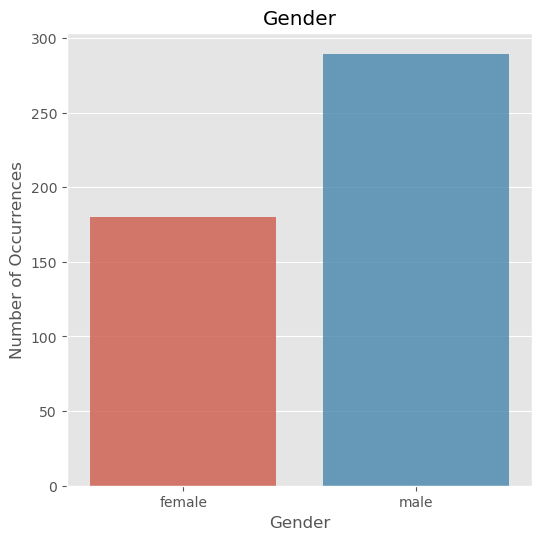

In [53]:
plt.figure()
sns.countplot(data=clinical_df, x='gender', alpha=0.8)
plt.title('Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

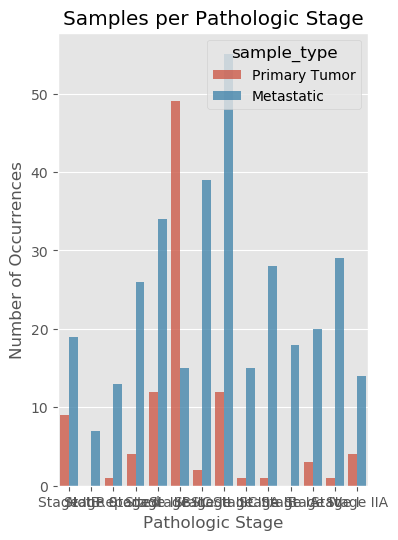

In [34]:
plt.figure()
sns.countplot(data=clinical_df, x='ajcc_pathologic_stage', hue='sample_type', alpha=0.8)
plt.title('Samples per Pathologic Stage')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Pathologic Stage', fontsize=12)
plt.show()

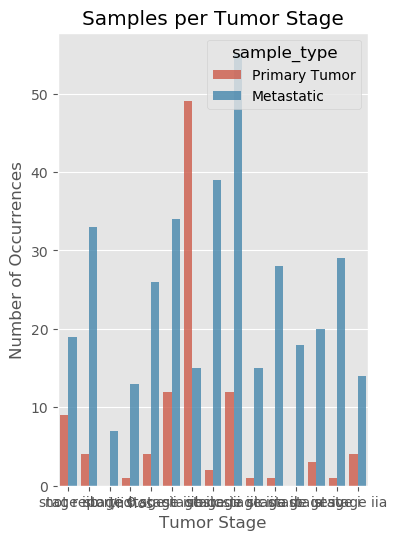

In [35]:
plt.figure()
sns.countplot(data=clinical_df, x='tumor_stage', hue='sample_type', alpha=0.8)
plt.title('Samples per Tumor Stage')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tumor Stage', fontsize=12)
plt.show()

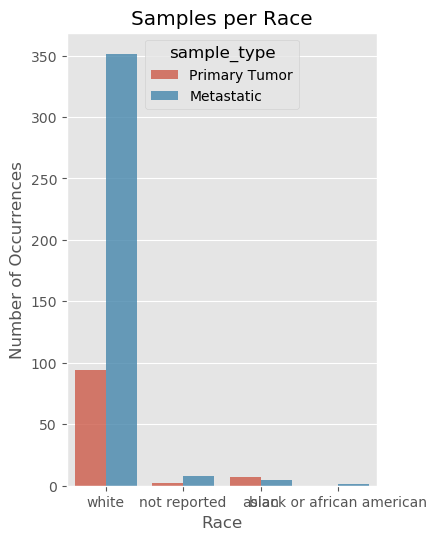

In [36]:
plt.figure()
sns.countplot(data=clinical_df, x='race', hue='sample_type', alpha=0.8)
plt.title('Samples per Race')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

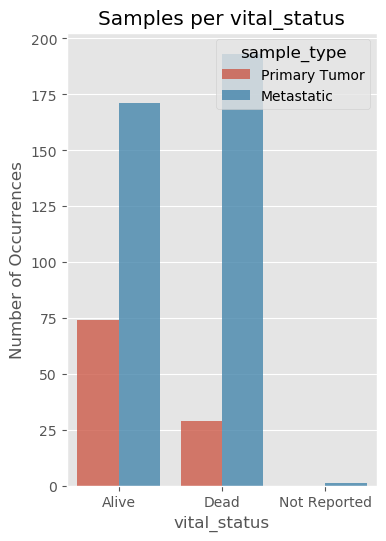

In [37]:
plt.figure()
sns.countplot(data=clinical_df, x='vital_status', hue='sample_type', alpha=0.8)
plt.title('Samples per vital_status')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('vital_status', fontsize=12)
plt.show()

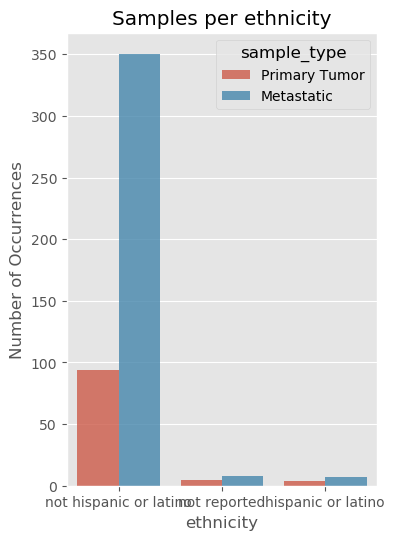

In [38]:
plt.figure()
sns.countplot(data=clinical_df, x='ethnicity', hue='sample_type', alpha=0.8)
plt.title('Samples per ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ethnicity', fontsize=12)
plt.show()

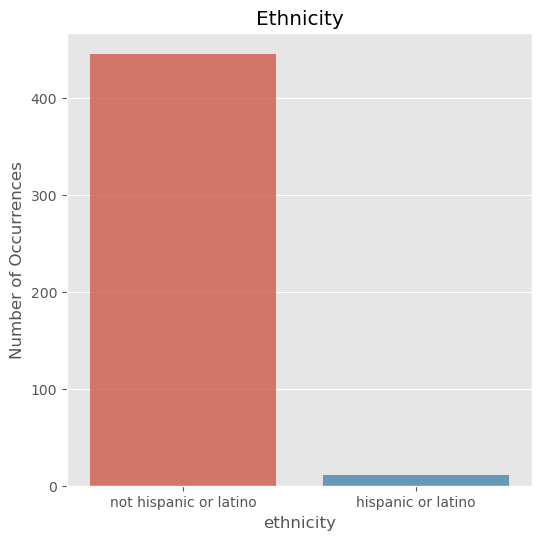

In [52]:
plt.figure()
sns.countplot(data=clinical_df[clinical_df["ethnicity"] != "not reported"], x='ethnicity', alpha=0.8)
plt.title('Ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('ethnicity', fontsize=12)
plt.show()

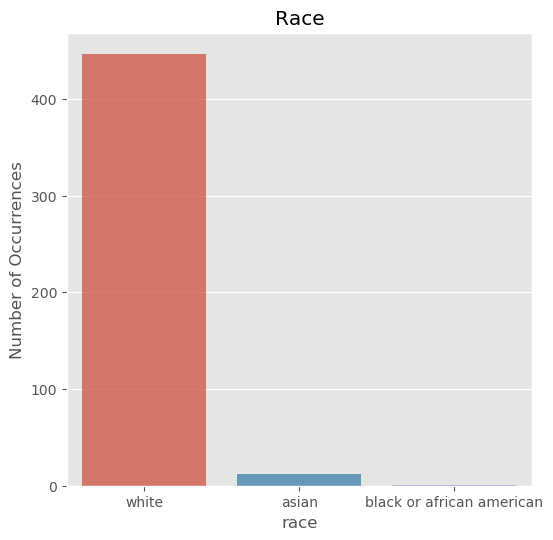

In [51]:
plt.figure()
sns.countplot(data=clinical_df[clinical_df["race"] != "not reported"], x='race', alpha=0.8)
plt.title('Race')
plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('', fontsize=12)
plt.show()

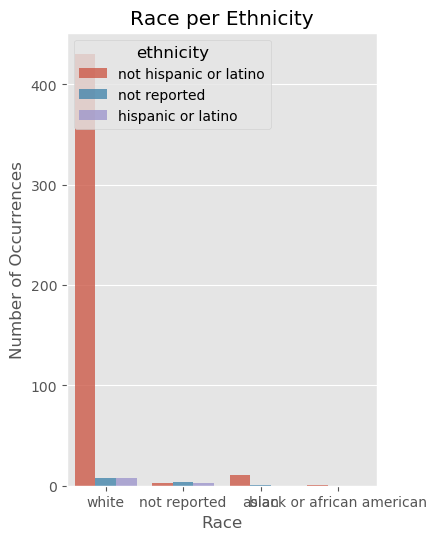

In [40]:
plt.figure()
sns.countplot(data=clinical_df, x='race', hue='ethnicity', alpha=0.8)
plt.title('Race per Ethnicity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

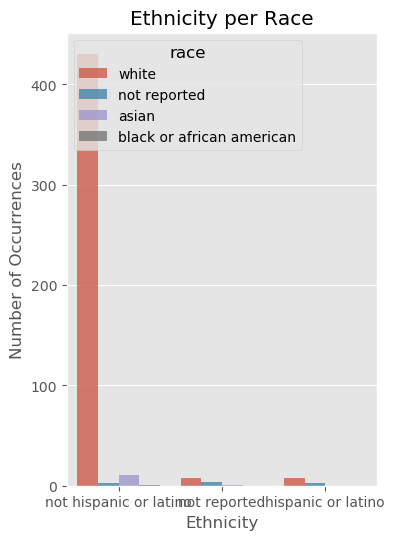

In [41]:
plt.figure()
sns.countplot(data=clinical_df, x='ethnicity', hue='race', alpha=0.8)
plt.title('Ethnicity per Race')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ethnicity', fontsize=12)
plt.show()

In [16]:
clinical_df.groupby(['race','ethnicity'])['race'].agg(['count'])

count
race                      ethnicity                    
asian                     not hispanic or latino     11
                          not reported                1
black or african american not hispanic or latino      1
not reported              hispanic or latino          3
                          not hispanic or latino      3
                          not reported                4
white                     hispanic or latino          8
                          not hispanic or latino    431
                          not reported                8

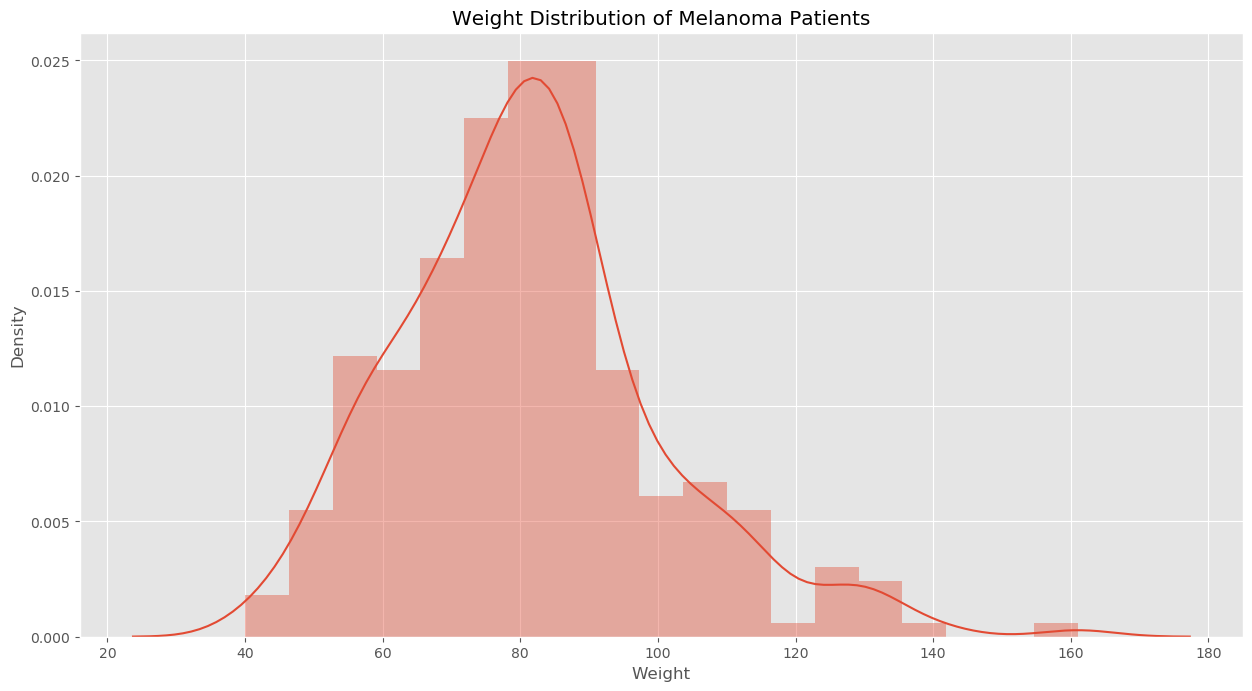

In [17]:
plt.figure()
sns.distplot(clinical_df.weight)
plt.title('Weight Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Weight', fontsize=12)
plt.show()

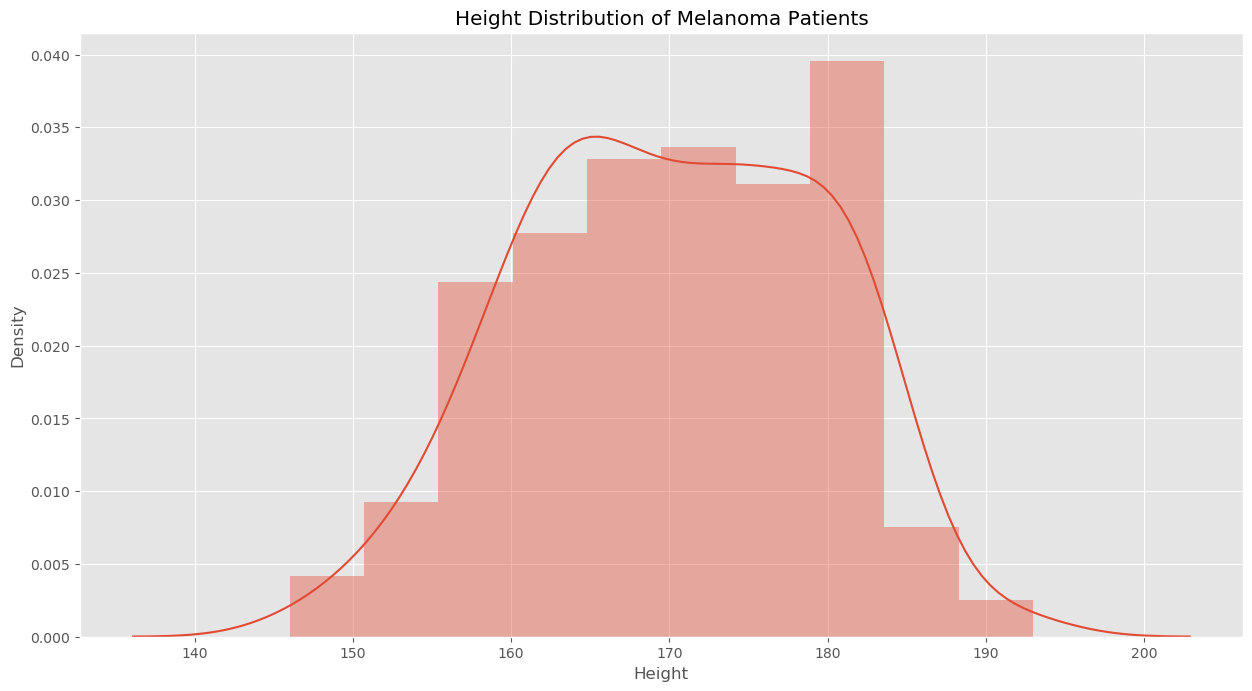

In [18]:
plt.figure()
sns.distplot(clinical_df.height)
plt.title('Height Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Height', fontsize=12)
plt.show()

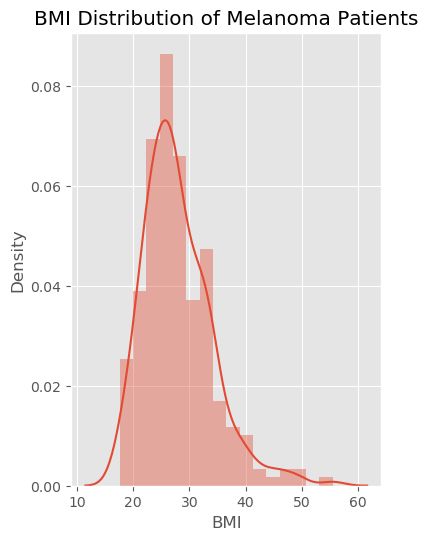

In [42]:
plt.figure()
sns.distplot(clinical_df.bmi)
plt.title('BMI Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('BMI', fontsize=12)
plt.show()

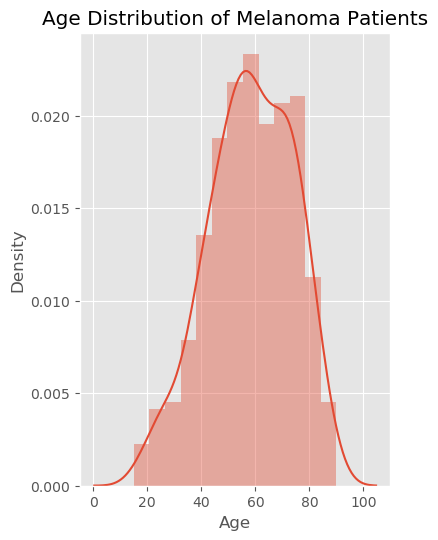

In [43]:
plt.figure()
sns.distplot(clinical_df.age_at_index)
plt.title('Age Distribution of Melanoma Patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

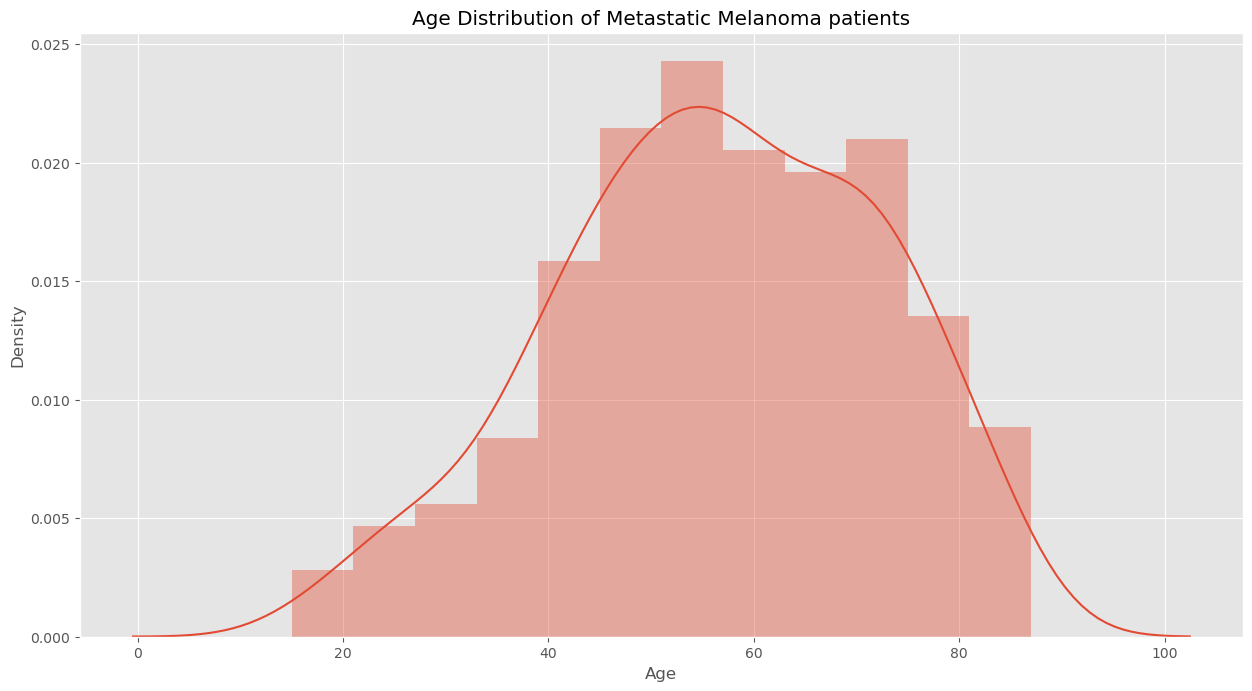

In [21]:
plt.figure()
sns.distplot(clinical_df[clinical_df["sample_type"] ==  "Metastatic"].age_at_index)
plt.title('Age Distribution of Metastatic Melanoma patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

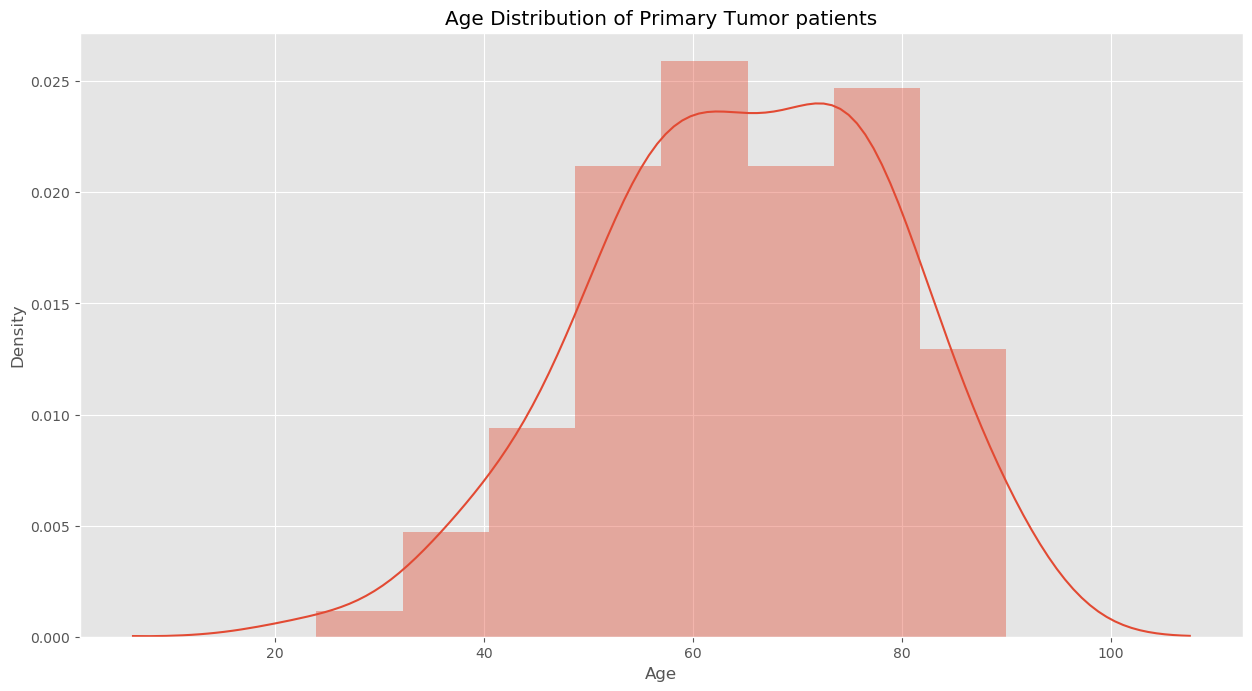

In [22]:
plt.figure()
sns.distplot(clinical_df[clinical_df["sample_type"] ==  "Primary Tumor"].age_at_index, hist = True)
plt.title('Age Distribution of Primary Tumor patients')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

In [23]:
clinical_df['sample_type'].value_counts()

Metastatic             365
Primary Tumor          103
Solid Tissue Normal      1
Name: sample_type, dtype: int64

In [24]:
clinical_df['race'].value_counts()

white                        447
asian                         12
not reported                  10
black or african american      1
Name: race, dtype: int64

In [25]:
rnaseq_df = pd.read_csv('../data/RNASeq/SKCM_DATA_RNASeq.csv', index_col = 0)
print(rnaseq_df.shape)
rnaseq_df.head()

(19947, 473)


,TCGA-W3-AA21-06A-11R-A38C-07,TCGA-ER-A19F-06A-11R-A18S-07,TCGA-BF-AAP4-01A-11R-A40A-07,TCGA-EE-A2MF-06A-11R-A21D-07,TCGA-EE-A2MJ-06A-11R-A18S-07,TCGA-D3-A8GM-06A-11R-A37K-07,TCGA-GN-A26A-06A-11R-A18T-07,TCGA-EB-A3XE-01A-12R-A239-07,TCGA-DA-A1I0-06A-11R-A20F-07,TCGA-FR-A3R1-01A-11R-A239-07,TCGA-EE-A3AA-06A-11R-A18S-07,TCGA-EE-A3AF-06A-11R-A18S-07,TCGA-D9-A4Z6-06A-12R-A266-07,TCGA-EE-A2MQ-06A-11R-A18S-07,TCGA-FS-A1YX-06A-11R-A18T-07,TCGA-D3-A8GC-06A-11R-A37K-07,TCGA-GN-A8LL-06A-21R-A37K-07,TCGA-D3-A1Q7-06A-11R-A18T-07,TCGA-ER-A19P-06A-11R-A18S-07,TCGA-YG-AA3N-01A-11R-A38C-07,TCGA-D3-A1QB-06A-11R-A18T-07,TCGA-DA-A960-01A-11R-A37K-07,TCGA-FS-A4FB-06A-11R-A266-07,TCGA-DA-A1HV-06A-21R-A18S-07,TCGA-ER-A3PL-06A-11R-A239-07,TCGA-FS-A1Z7-06A-11R-A18T-07,TCGA-RP-A693-06A-13R-A311-07,TCGA-XV-A9W5-01A-11R-A38C-07,TCGA-FS-A4F4-06A-12R-A266-07,TCGA-LH-A9QB-06A-11R-A38C-07,TCGA-EE-A2GB-06A-11R-A18T-07,TCGA-D3-A3MR-06A-11R-A21D-07,TCGA-ER-A42L-06A-11R-A24X-07,TCGA-EE-A2M8-06A-12R-A18S-07,TCGA-FS-A1Z4-06A-11R-A18T-07,TCGA-D9-A6EA-06A-11R-A311-07,TCGA-D3-A5GU-06A-11R-A27Q-07,TCGA-EE-A29X-06A-11R-A18T-07,TCGA-EB-A4IS-01A-21R-A266-07,TCGA-GF-A769-01A-32R-A32P-07,TCGA-EE-A2GM-06B-11R-A18S-07,TCGA-W3-AA1V-06B-11R-A40A-07,TCGA-EB-A4XL-01A-11R-A27Q-07,TCGA-EE-A3J8-06A-11R-A20F-07,TCGA-EE-A3JD-06A-11R-A20F-07,TCGA-ER-A19O-06A-11R-A18S-07,TCGA-D3-A1QA-06A-11R-A18T-07,TCGA-D3-A2J7-06A-11R-A18T-07,TCGA-EE-A20B-06A-11R-A18U-07,TCGA-ER-A19N-06A-11R-A18S-07,TCGA-EE-A2GT-06A-12R-A18S-07,TCGA-GN-A264-06A-11R-A18U-07,TCGA-FR-A726-01A-11R-A32P-07,TCGA-EB-A57M-01A-51R-A311-07,TCGA-FS-A4FC-06A-11R-A24X-07,TCGA-GN-A8LN-01A-11R-A37K-07,TCGA-BF-A9VF-01A-11R-A37K-07,TCGA-FS-A4F9-06A-11R-A24X-07,TCGA-D9-A3Z1-06A-11R-A239-07,TCGA-EB-A550-01A-61R-A27Q-07,TCGA-DA-A1IB-06A-11R-A18S-07,TCGA-EE-A29C-06A-21R-A18S-07,TCGA-FR-A728-01A-11R-A32P-07,TCGA-FS-A4F0-06A-11R-A24X-07,TCGA-EE-A2MI-06A-11R-A18U-07,TCGA-D3-A8GD-06A-11R-A37K-07,TCGA-WE-AAA0-06A-11R-A38C-07,TCGA-ER-A19S-06A-11R-A18U-07,TCGA-FR-A729-06A-11R-A352-07,TCGA-D3-A2JH-06A-11R-A18T-07,TCGA-EE-A182-06A-11R-A18T-07,TCGA-D3-A2JD-06A-11R-A18T-07,TCGA-QB-A6FS-06A-11R-A311-07,TCGA-EB-A5SF-01A-11R-A311-07,TCGA-YD-A9TA-06A-11R-A39D-07,TCGA-FR-A69P-06A-21R-A311-07,TCGA-EE-A2M6-06A-12R-A18S-07,TCGA-ER-A194-01A-11R-A18U-07,TCGA-FS-A1ZE-06A-11R-A18T-07,TCGA-WE-A8ZY-06A-11R-A37K-07,TCGA-EE-A2GS-06A-12R-A18S-07,TCGA-FR-A2OS-01A-11R-A21D-07,TCGA-D3-A5GO-06A-12R-A27Q-07,TCGA-EB-A1NK-01A-11R-A18T-07,TCGA-EB-A6QZ-01A-12R-A32P-07,TCGA-WE-A8ZQ-06A-41R-A37K-07,TCGA-EB-A5SH-06A-11R-A311-07,TCGA-ER-A199-06A-11R-A18T-07,TCGA-WE-A8ZM-06A-11R-A37K-07,TCGA-FR-A7UA-06A-32R-A352-07,TCGA-EB-A4OY-01A-11R-A266-07,TCGA-FS-A1ZY-06A-11R-A18S-07,TCGA-EE-A29S-06A-11R-A18T-07,TCGA-EE-A29Q-06A-11R-A18T-07,TCGA-FS-A1YW-06A-11R-A18T-07,TCGA-GN-A4U5-01A-11R-A32P-07,TCGA-ER-A3ES-06A-11R-A20F-07,TCGA-FR-A3YN-06A-11R-A239-07,TCGA-D9-A6EG-06A-12R-A32P-07,TCGA-EB-A6R0-01A-12R-A32P-07,TCGA-D3-A3CB-06A-11R-A18S-07,TCGA-D9-A4Z2-01A-11R-A24X-07,TCGA-FS-A1ZP-06A-11R-A18T-07,TCGA-FS-A1ZT-06A-11R-A18U-07,TCGA-HR-A2OG-06A-21R-A18U-07,TCGA-D3-A3BZ-06A-12R-A18S-07,TCGA-EB-A44R-06A-41R-A266-07,TCGA-YD-A9TB-06A-12R-A40A-07,TCGA-FW-A5DY-06A-11R-A311-07,TCGA-ER-A19C-06A-11R-A18S-07,TCGA-D3-A3C6-06A-12R-A18U-07,TCGA-ER-A2NC-06A-11R-A18T-07,TCGA-D3-A3C7-06A-11R-A18U-07,TCGA-BF-A3DJ-01A-11R-A20F-07,TCGA-D3-A2J6-06A-11R-A18T-07,TCGA-FS-A4F5-06A-11R-A266-07,TCGA-EE-A3JB-06A-11R-A21D-07,TCGA-D9-A1X3-06A-11R-A18S-07,TCGA-RP-A690-06A-11R-A311-07,TCGA-D3-A8GO-06A-11R-A37K-07,TCGA-D9-A4Z3-01A-11R-A266-07,TCGA-DA-A1I4-06A-11R-A18U-07,TCGA-FR-A7U9-06A-11R-A352-07,TCGA-ER-A19E-06A-11R-A18S-07,TCGA-EE-A3AD-06A-11R-A18S-07,TCGA-W3-AA1Q-06A-11R-A38C-07,TCGA-D3-A5GT-01A-12R-A311-07,TCGA-YD-A89C-06A-11R-A37K-07,TCGA-EE-A17Z-06A-11R-A18S-07,TCGA-XV-A9W2-01A-11R-A39D-07,TCGA-EB-A430-01A-11R-A24X-07,TCGA-D3-A3MU-06A-11R-A21D-07,TCGA-EE-A3JA-06A-11R-A20F-07,TCGA-EE-A29B-06A-11R-A18U-07,TCGA-BF-AAP6-01A-11R-A40A-07,TCGA-RP-A6K9-06A-41R-A352-07,TCGA-D3-A1Q5-06A-11R-A18T-07,TCGA-ER-A2NF-01A-11R-A18T-

In [26]:
X = rnaseq_df.T
X.index = [index[0:12] for index in X.index.values]
X.index.names = ['submitter_id']
print(X.shape)
print(X.index[X.index.duplicated()].unique())
X = X[~X.index.duplicated(keep='first')]
print(X.shape)
X.head()

(473, 19947)
Index(['TCGA-GN-A4U8', 'TCGA-ER-A2NF', 'TCGA-ER-A19T', 'TCGA-D3-A1QA'], dtype='object', name='submitter_id')
(469, 19947)


,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTC1,ACTG1,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,CRISP1,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOBEC1,APOC1,APOC1P1,AQP8,APOC4-APOC2,APOC3,APOC4-APOC2,APOD,APOE,APOH,...,SNORD116-15,SNORD116-16,SNORD116-18,SNORD116-20,SNHG14,SNORD116-23,SNORD116-24,SNORD116-25,SNORD115-2,SNORD116-26,SNORD116-27,SNORD115-3,SNORD115-4,SNORD115-5,SNORD115-6,SNHG14,SNORD115-8,SNORD115-9,SNORD115-10,SNORD115-11,SNHG14,SNORD115-14,SNORD115-16,SNORD115-17,SNORD115-20,SNORD115-22,SNORD115-25,SNHG14,SNORD115-30,SNORD115-31,SNORD115-32,SNORD115-33,SNORD115-35,SNORD115-37,SNORD115-38,SNORD115-39,SNORD115-40,SNORD115-41,SNORD115-44,SNHG14,SNORD116-29,SNORD115-48,FOXD4L2,SNORD115-24,SNORD115-27,SNORD115-28,SNORD115-45,SNORD115-47,DDTL,TLX1NB,CDKN2B-AS1,SIGLEC14,MIMT1,SNHG8,TTTY1B,HAVCR1P1,POM121C,ZSCAN30,RP3-324O17.4,GAGE2E,SNORD119,SNORD121A,SNORD125,GNL3,SNORD105B,SNORD123,SNORD127,SNORD126,SNORD11B,SNORD12B,SNORD111B,TMEM170B,FAM138E,RPL17,SNORA84,SNORA36C,SNORA38B,SNORA70B,SNORA70C,SNORA11B,SNORA11C,SNORA11E,HOTAIR,ZGLP1,FAM86JP,FMR1-AS1,RP11-359E10.1,EGOT,GHRLOS,RP11-93B14.5,C10orf131,DPPA2P2,RP11-379K17.4,TMPO-AS1,RP11-713P17.3,DNM1P35,TRAPPC3L,FAM225B,CTAGE9,C19orf71,ACVR2B-AS1,HPN-AS1,OST4,LINC00476,SRRM2-AS1,GPR158-AS1,LINC01003,ZBTB42,KTN1-AS1,KHDC1L,C1orf68,NRADDP,GABPB1-AS1,FAM106B,RPL19P12,ZNF37BP,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,AC005176.2,URAHP,FTLP10,HSFX2,SNAP47,RP5-1027G4.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,KRTAP25-1,RRN3P3,FAM66E,AC009501.4,NPIPB5,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J,NBPF10,FCGR1B,FAM99B,KRTAP4-7,GOLGA8G,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5,FAM66D,FAM182B,GOLGA8EP,FAM95B1,FAM182B,UBE2Q2P2,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2,TEN1,POLR2J3,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,RNU6ATAC,SCARNA9,TEX36-AS1,PATE3,SRRM5,C19orf69,C17orf96,PRICKLE4,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,RP11-789C17.3,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [27]:
df = clinical_df.merge(X, left_index=True, right_index=True)
df.head()

,synchronous_malignancy,ajcc_pathologic_stage,tumor_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,age_at_diagnosis,updated_datetime,prior_malignancy,year_of_diagnosis,prior_treatment,state,days_to_last_known_disease_status,ajcc_staging_system_edition,ajcc_pathologic_t,days_to_recurrence,morphology,ajcc_pathologic_n,ajcc_pathologic_m,classification_of_tumor,diagnosis_id,icd_10_code,site_of_resection_or_biopsy,tumor_grade,progression_or_recurrence,cigarettes_per_day,alcohol_history,exposure_id,years_smoked,weight,alcohol_intensity,height,bmi,race,gender,ethnicity,vital_status,age_at_index,days_to_birth,year_of_birth,demographic_id,year_of_death,days_to_death,treatments_pharmaceutical_treatment_intent_type,treatments_pharmaceutical_treatment_id,treatments_pharmaceutical_treatment_type,treatments_pharmaceutical_therapeutic_agents,treatments_pharmaceutical_treatment_or_therapy,treatments_pharmaceutical_days_to_treatment_end,treatments_pharmaceutical_days_to_treatment_start,treatments_pharmaceutical_regimen_or_line_of_therapy,treatments_pharmaceutical_treatment_effect,treatments_pharmaceutical_initial_disease_status,treatments_pharmaceutical_treatment_anatomic_site,treatments_pharmaceutical_treatment_outcome,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_id,treatments_radiation_treatment_type,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_days_to_treatment_end,treatments_radiation_days_to_treatment_start,treatments_radiation_regimen_or_line_of_therapy,treatments_radiation_treatment_effect,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease,sample_type,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTC1,ACTG1,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,CRISP1,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,...,SNORD116-15,SNORD116-16,SNORD116-18,SNORD116-20,SNHG14,SNORD116-23,SNORD116-24,SNORD116-25,SNORD115-2,SNORD116-26,SNORD116-27,SNORD115-3,SNORD115-4,SNORD115-5,SNORD115-6,SNHG14,SNORD115-8,SNORD115-9,SNORD115-10,SNORD115-11,SNHG14,SNORD115-14,SNORD115-16,SNORD115-17,SNORD115-20,SNORD115-22,SNORD115-25,SNHG14,SNORD115-30,SNORD115-31,SNORD115-32,SNORD115-33,SNORD115-35,SNORD115-37,SNORD115-38,SNORD115-39,SNORD115-40,SNORD115-41,SNORD115-44,SNHG14,SNORD116-29,SNORD115-48,FOXD4L2,SNORD115-24,SNORD115-27,SNORD115-28,SNORD115-45,SNORD115-47,DDTL,TLX1NB,CDKN2B-AS1,SIGLEC14,MIMT1,SNHG8,TTTY1B,HAVCR1P1,POM121C,ZSCAN30,RP3-324O17.4,GAGE2E,SNORD119,SNORD121A,SNORD125,GNL3,SNORD105B,SNORD123,SNORD127,SNORD126,SNORD11B,SNORD12B,SNORD111B,TMEM170B,FAM138E,RPL17,SNORA84,SNORA36C,SNORA38B,SNORA70B,SNORA70C,SNORA11B,SNORA11C,SNORA11E,HOTAIR,ZGLP1,FAM86JP,FMR1-AS1,RP11-359E10.1,EGOT,GHRLOS,RP11-93B14.5,C10orf131,DPPA2P2,RP11-379K17.4,TMPO-AS1,RP11-713P17.3,DNM1P35,TRAPPC3L,FAM225B,CTAGE9,C19orf71,ACVR2B-AS1,HPN-AS1,OST4,LINC00476,SRRM2-AS1,GPR158-AS1,LINC01003,ZBTB42,KTN1-AS1,KHDC1L,C1orf68,NRA

In [28]:
df[["C7", "KRT17", "S100A7A", "CLEC2A", "KRTDAP", "WFDC5", "KRT14", "S100A7", "KLK9", "LCE3D"]].describe()

,C7,KRT17,S100A7A,CLEC2A,KRTDAP,WFDC5,KRT14,S100A7,KLK9,LCE3D
count,469.000000,4.690000e+02,469.000000,469.000000,469.000000,469.000000,4.690000e+02,469.000000,469.000000,469.000000
mean,673.683438,1.084793e+04,311.430140,0.557137,705.094877,60.481893,2.262558e+04,1918.299580,56.646050,218.412579
std,1622.542708,8.217983e+04,2041.698068,2.685820,3958.047980,324.262268,1.755202e+05,10582.947354,393.049146,2032.196439
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12.356200,3.287500e+00,0.000000,0.000000,0.000000,0.000000,1.058200e+00,0.000000,0.000000,0.000000
50%,105.074500,1.305290e+01,0.000000,0.000000,0.000000,0.000000,1.161210e+01,0.369100,0.000000,0.000000
75%,565.690900,1.164091e+02,1.620100,0.000000,1.619300,0.431400,1.238804e+02,5.906700,0.336700,1.005400
max,18641.478600,1.338270e+06,31283.553000,27.385200,52913.973300,4161.440700,3.390701e+06,146922.013200,6352.185200,40872.012400


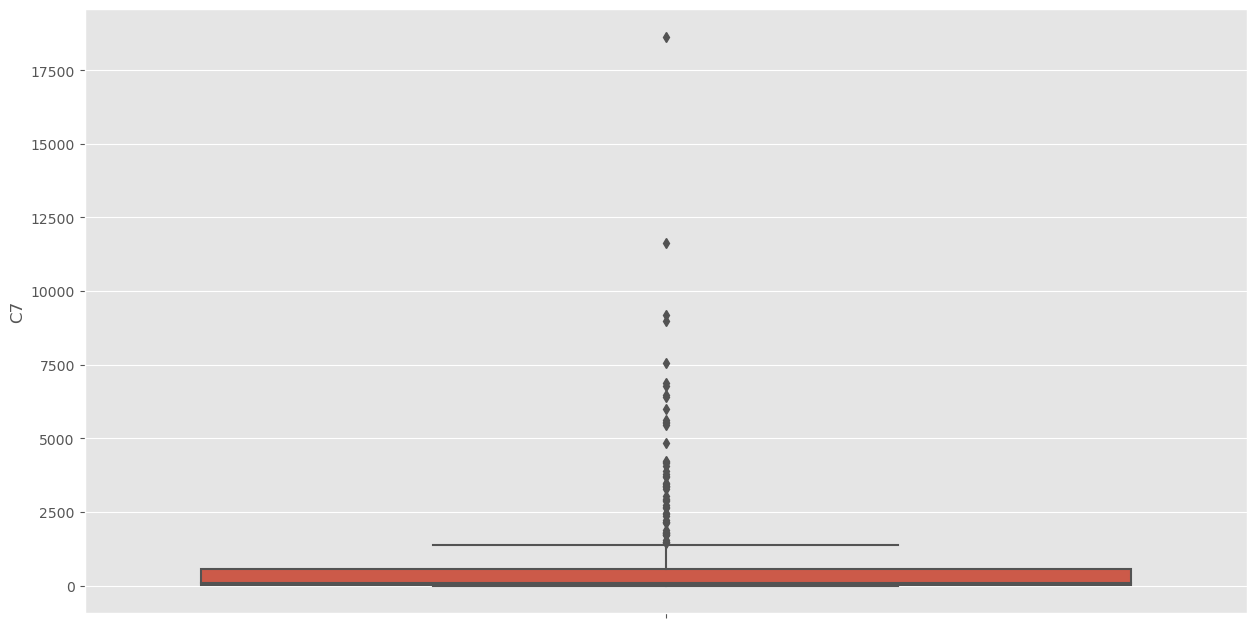

In [29]:
sns.boxplot(y=df["C7"])

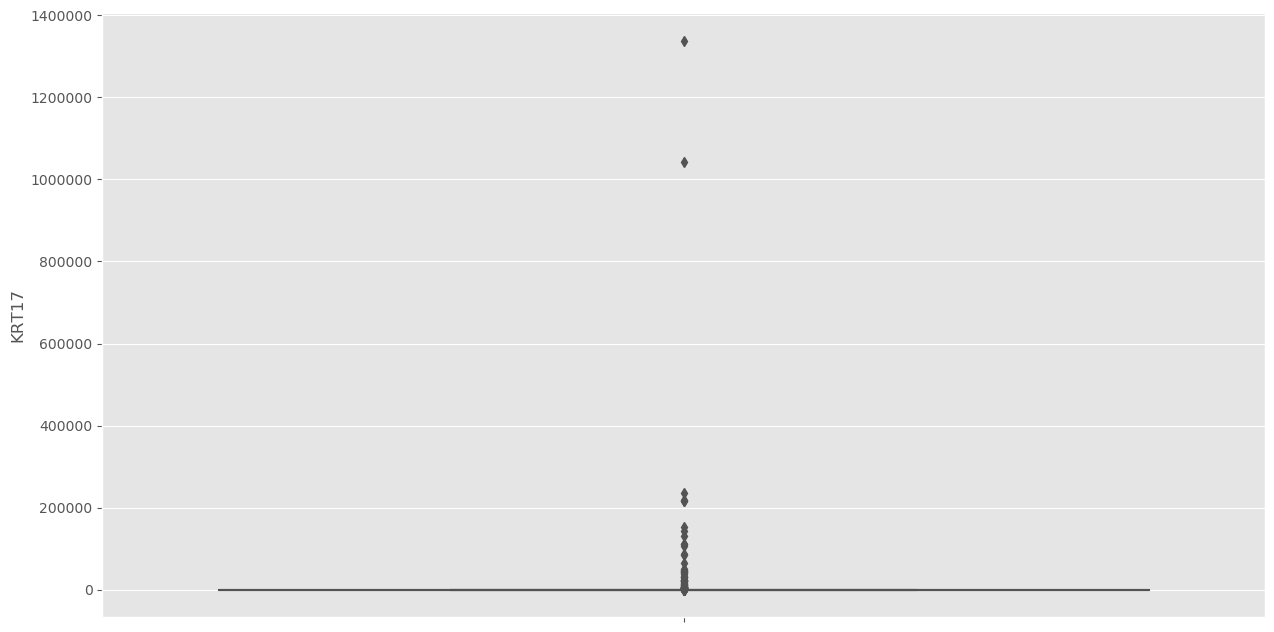

In [30]:
sns.boxplot(y=df["KRT17"])

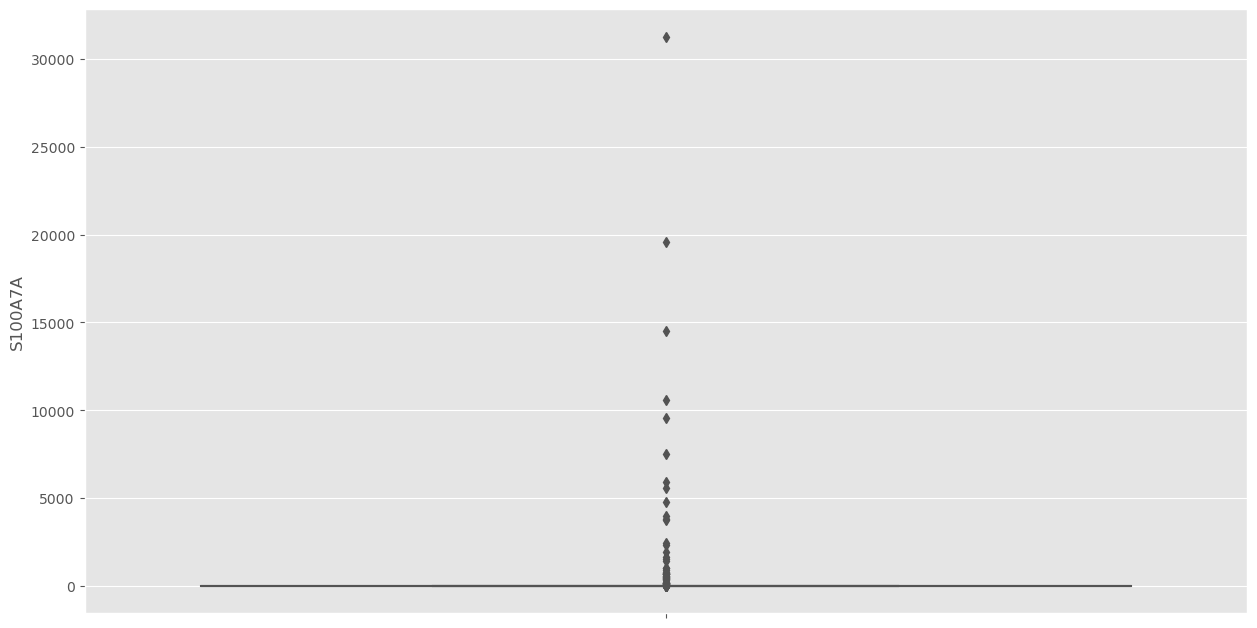

In [31]:
sns.boxplot(y=df["S100A7A"])

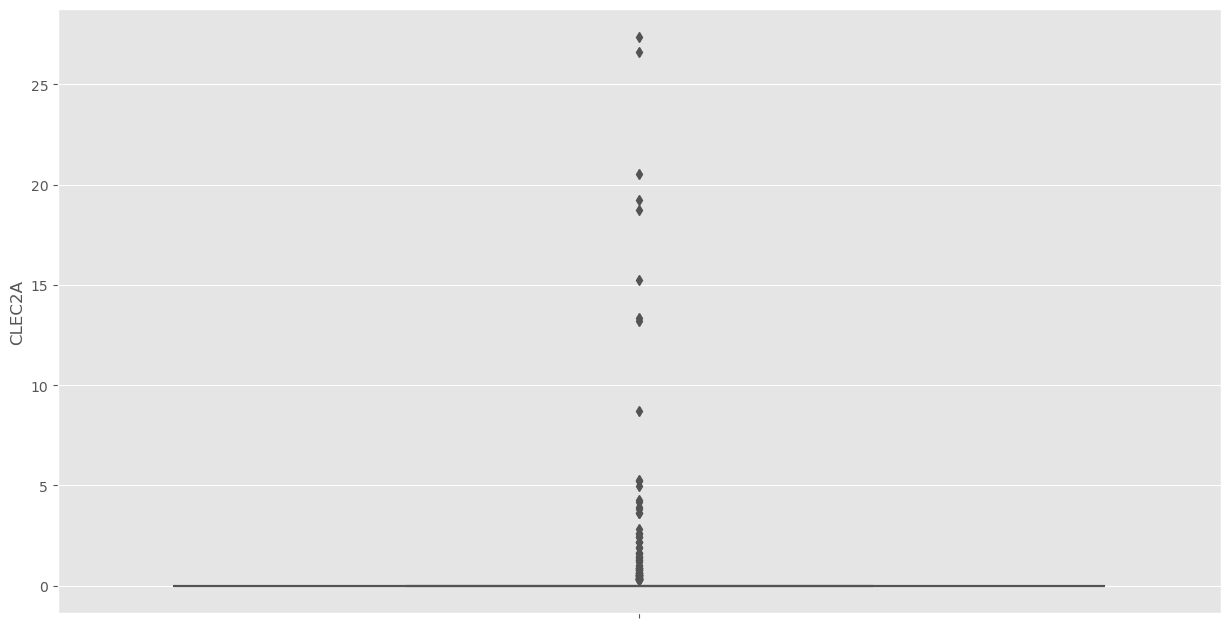

In [32]:
sns.boxplot(y=df["CLEC2A"])

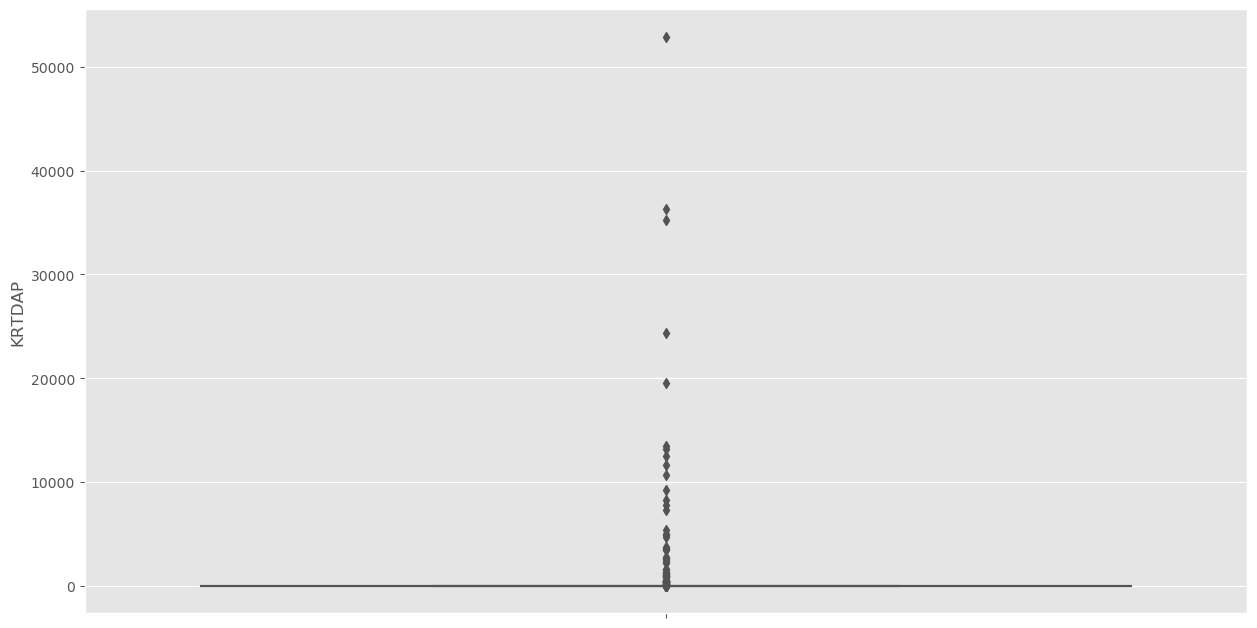

In [33]:
sns.boxplot(y=df["KRTDAP"])

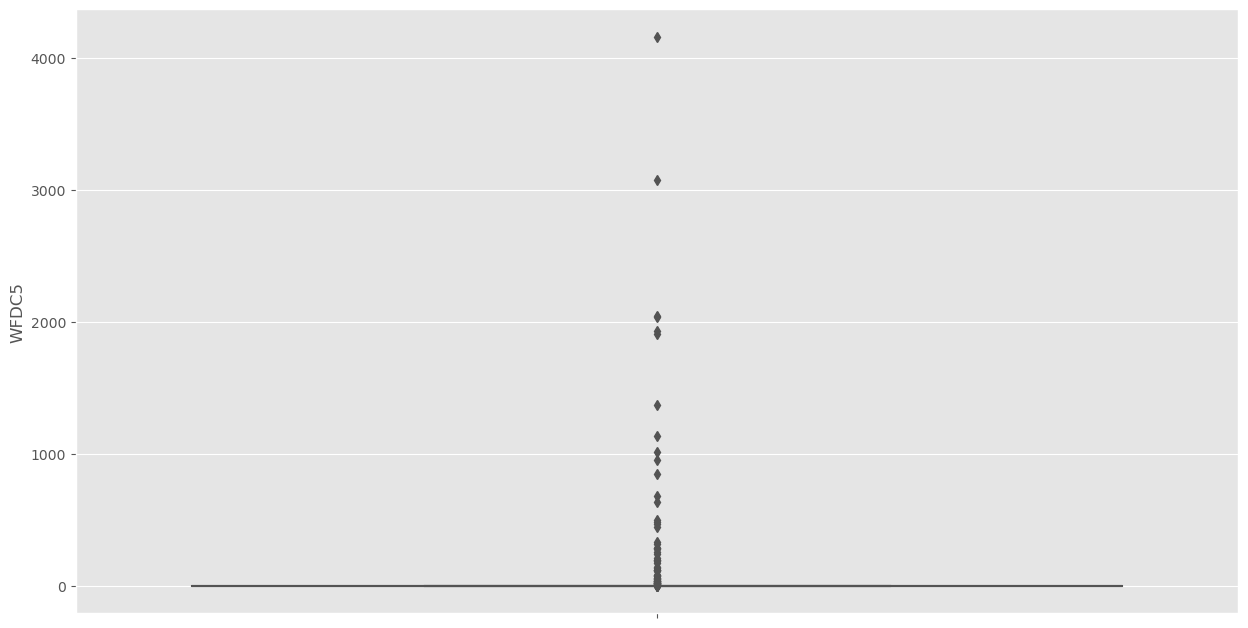

In [34]:
sns.boxplot(y=df["WFDC5"])

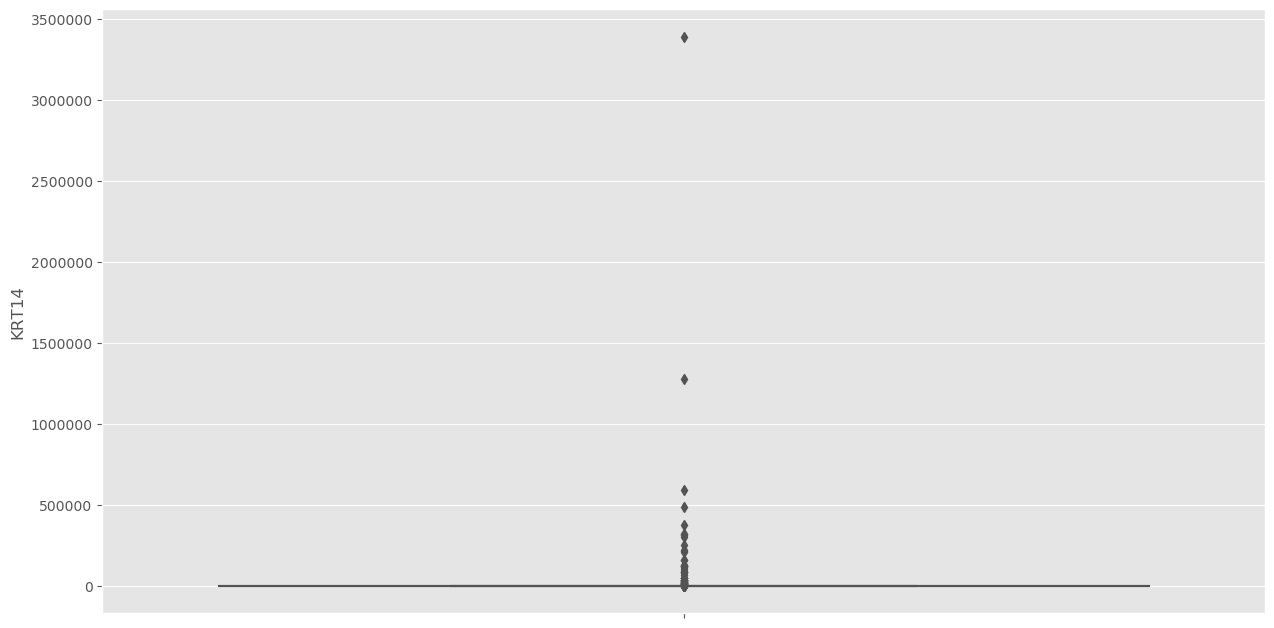

In [35]:
sns.boxplot(y=df["KRT14"])

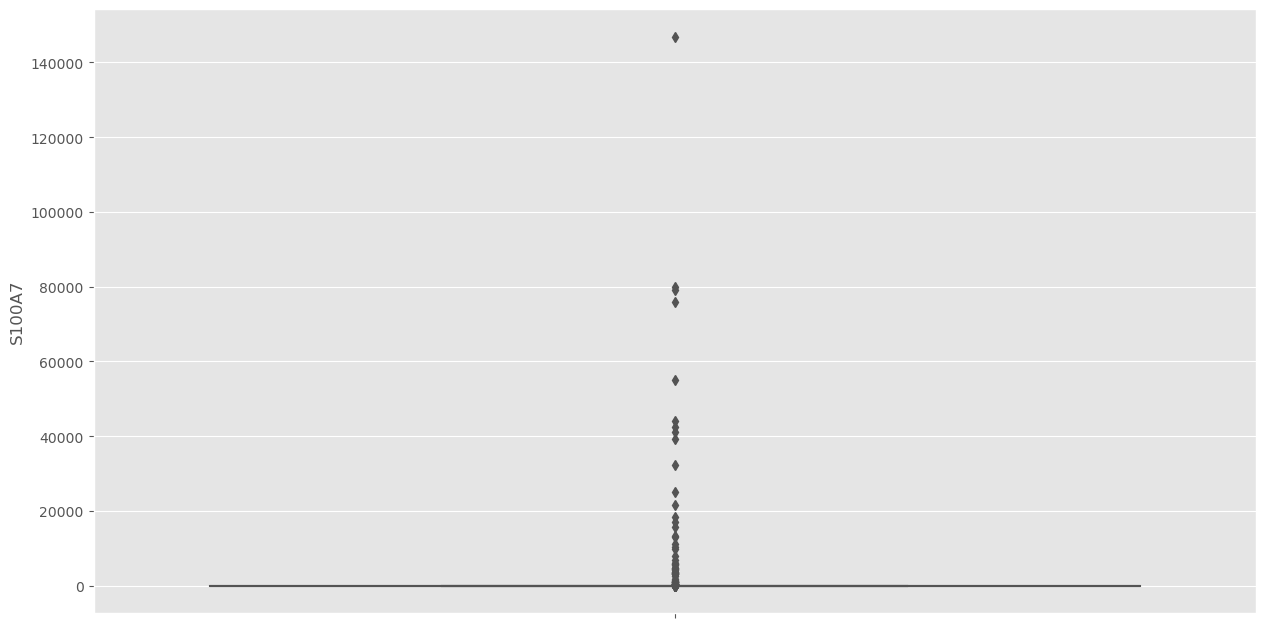

In [36]:
sns.boxplot(y=df["S100A7"])

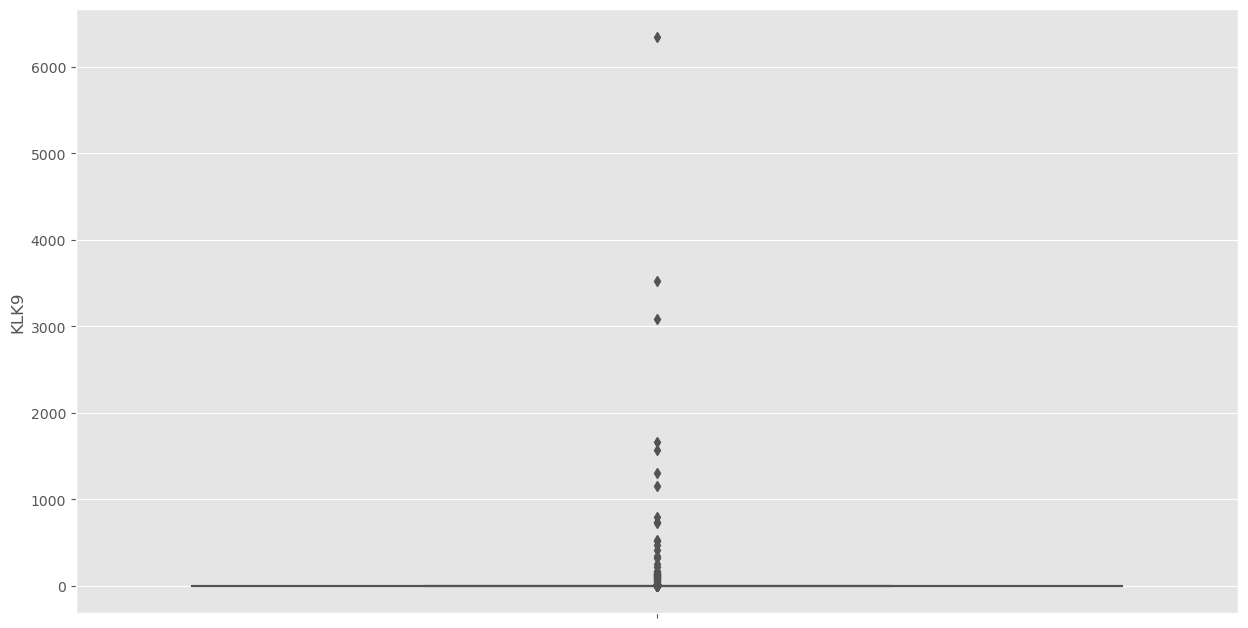

In [37]:
sns.boxplot(y=df["KLK9"])

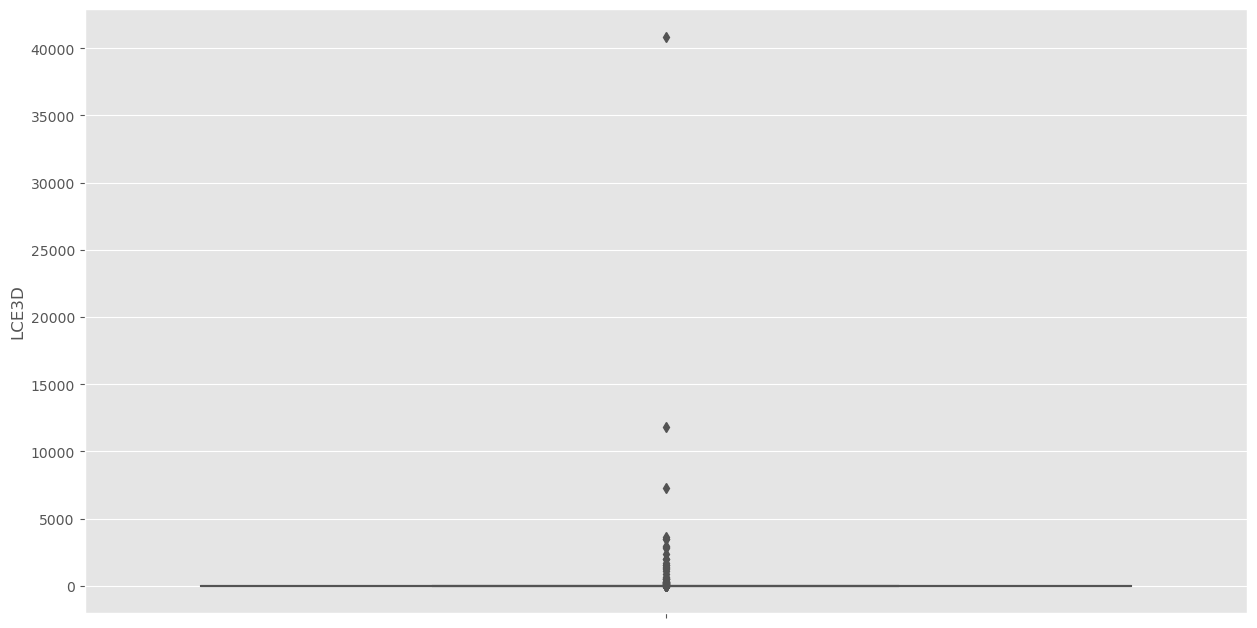

In [38]:
sns.boxplot(y=df["LCE3D"])

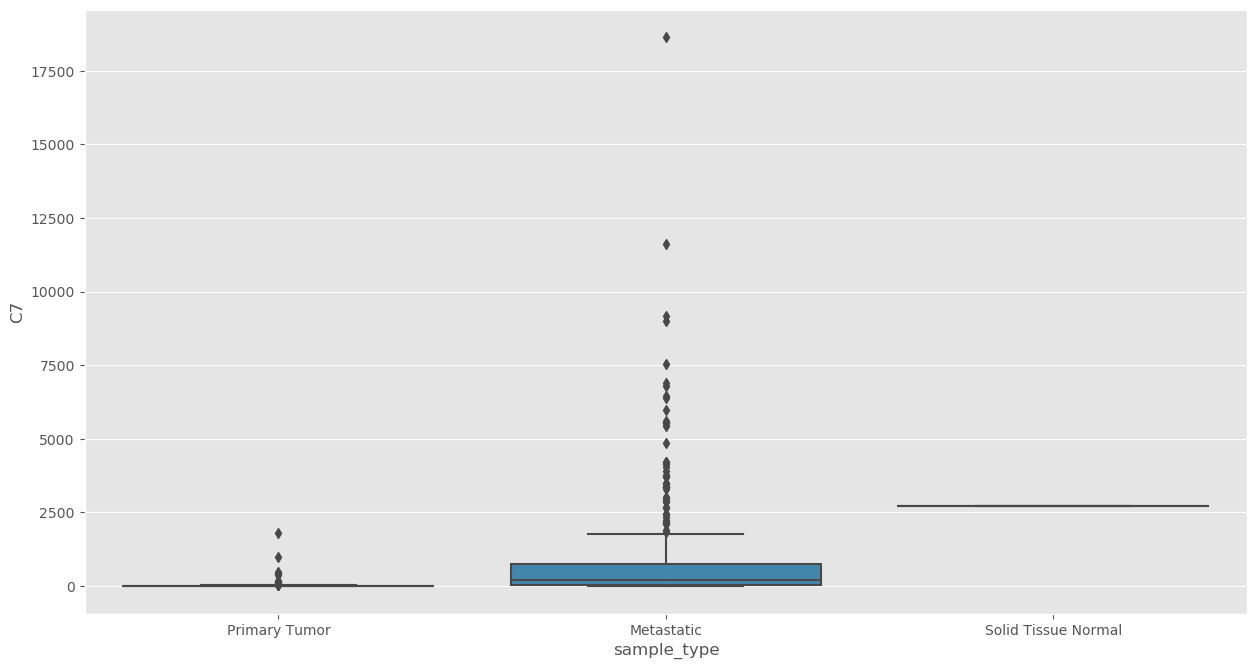

In [39]:
sns.boxplot(x="sample_type", y="C7", data=df, dodge=False)

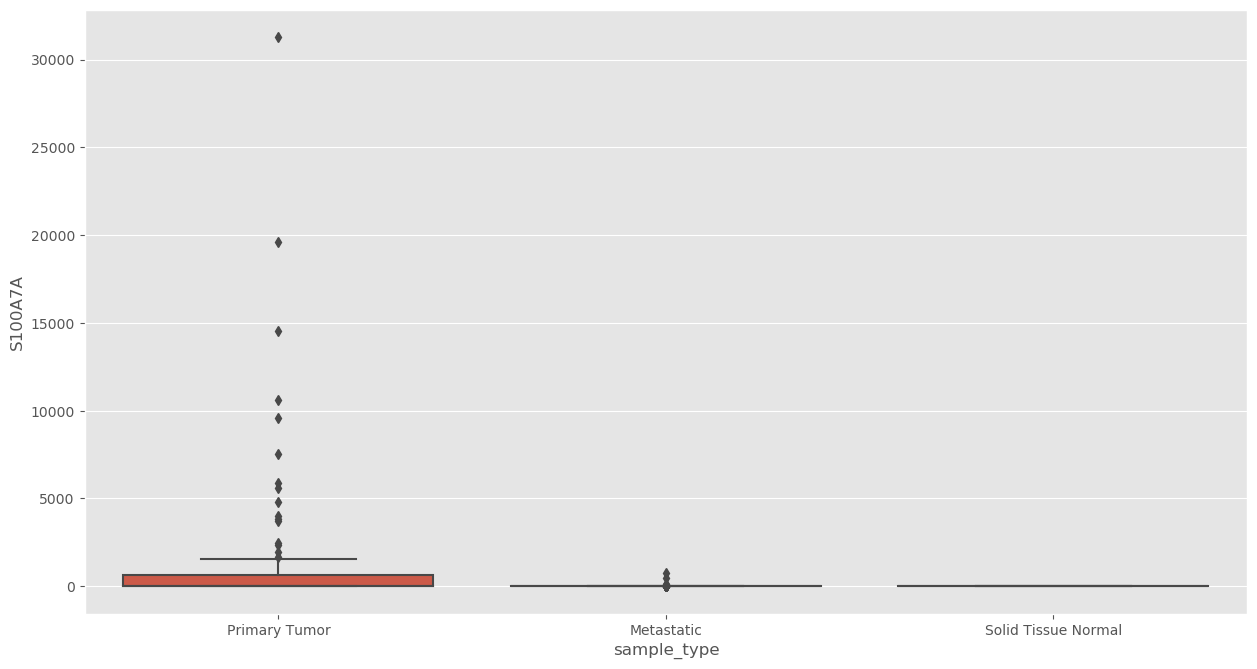

In [40]:
sns.boxplot(x="sample_type", y="S100A7A", data=df, dodge=False)

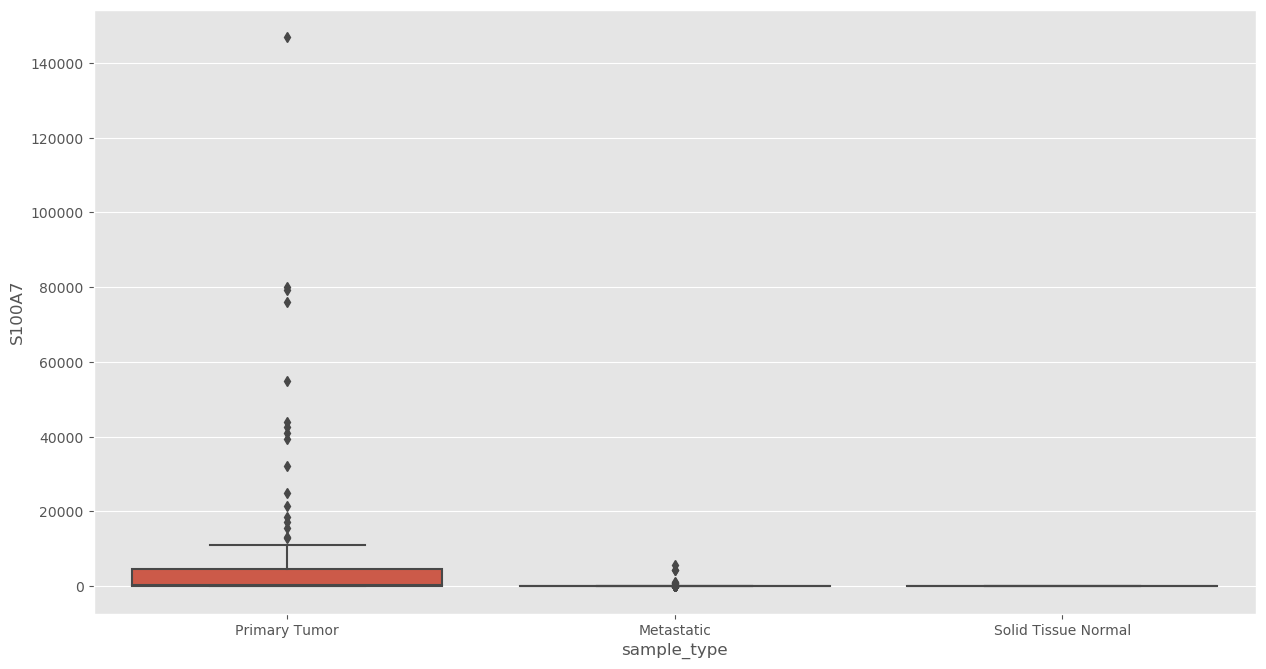

In [41]:
sns.boxplot(x="sample_type", y="S100A7", data=df, dodge=False)

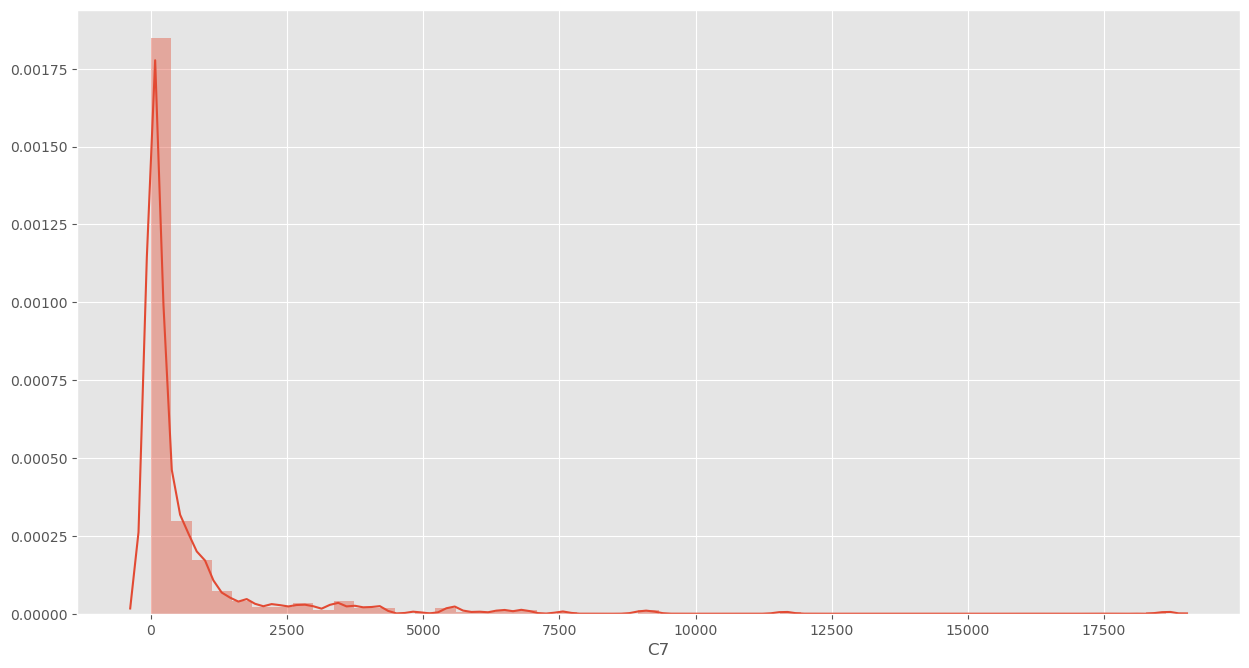

In [42]:
sns.distplot(df["C7"], hist = True)

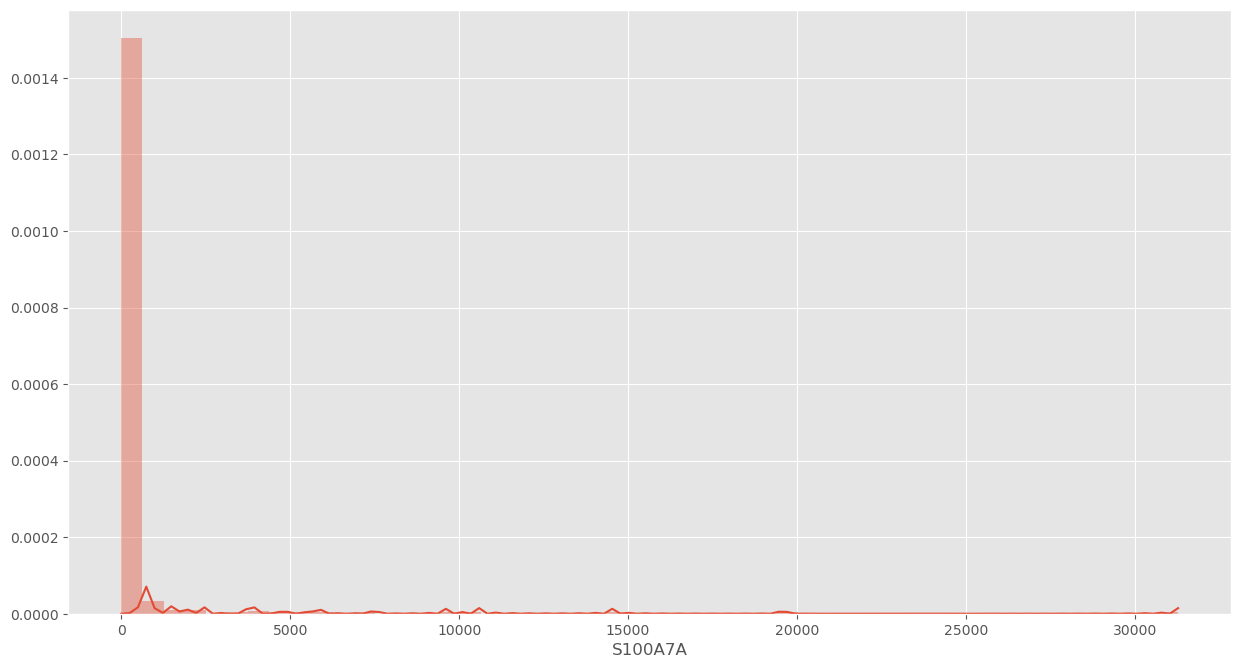

In [43]:
sns.distplot(df["S100A7A"], hist = True)

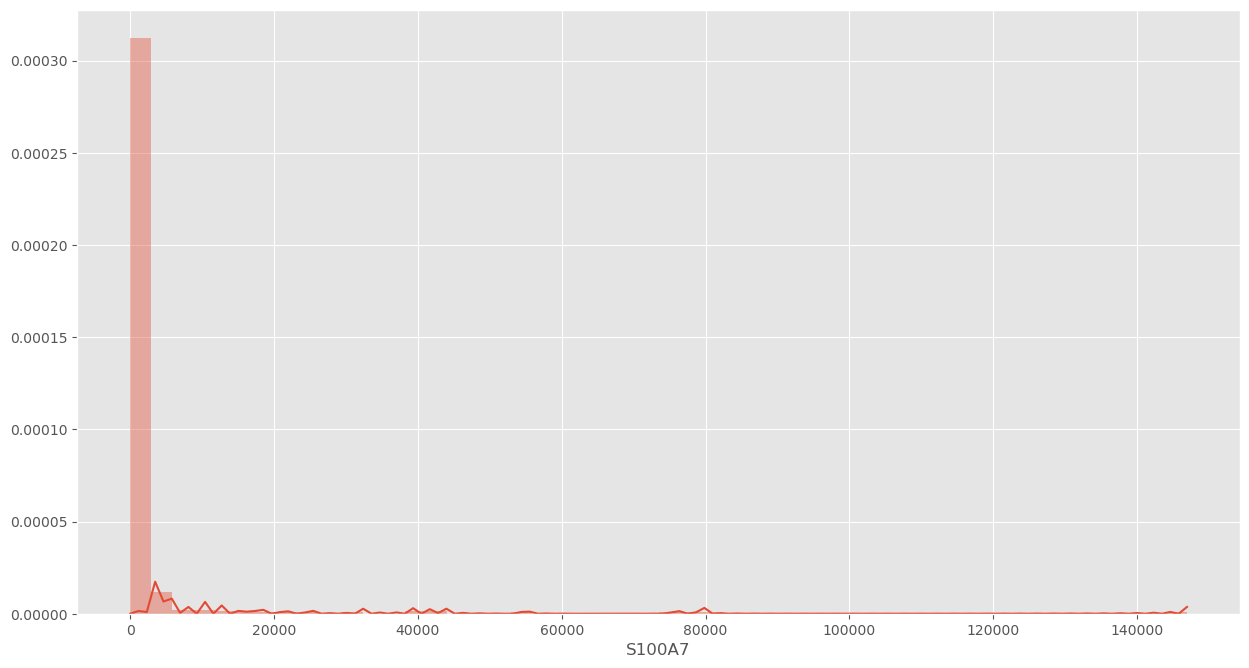

In [44]:
sns.distplot(df["S100A7"], hist = True)